In [509]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import reg_analysis as ra

In [510]:
train = pd.read_csv('../data/train_new.csv')
test = pd.read_csv('../data/test_new.csv')

In [511]:
train.drop(1567,axis=0,inplace=True)

In [512]:
train = train[train['stage']==1]
test = test[test['stage']==1]

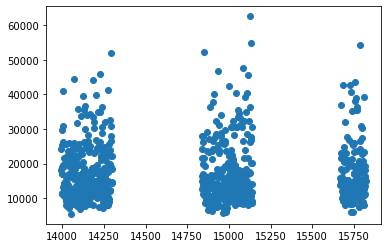

In [ ]:
plt.scatter(train['id'],train['y'])

In [514]:
t = train[train['stadium'] == 22].reset_index(drop=True)
t[['id','y','capa','home','absorp','distance','stadium']]

for i in range(len(t)):
    t.loc[i,'a'] = t.loc[i,'y']/t.loc[i,'capa']

t.groupby(['year','stadium'])['a'].mean()

year  stadium
2012  22         0.477074
2013  22         0.487651
2014  22         0.484243
Name: a, dtype: float64

In [515]:
test[test['match'] == 42]

,id,year,stage,match,home,away,stadium,week_day,month,day,...,discomfort,ranking_x,ranking_y,home_all,away_all,distance,week_absorp,jap_cnt,home_cum,away_cum


In [516]:
train.sort_values('id').reset_index(drop=True,inplace=True)
test.sort_values('id').reset_index(drop=True,inplace=True)

train.drop(['ｽｶﾊﾟｰ','BS-TBS','address','referee', 'stadium','away_stadium','home_stadium','home_01', 'home_02','home_03', 'home_04', 'home_05', 'home_06', 'home_07', 'home_08','home_09', 'home_10', 'home_11', 'away_01', 'away_02', 'away_03', 'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09','away_10', 'away_11','home_score','away_score','year','day','stage','station'],axis=1,inplace=True)

test.drop(['ｽｶﾊﾟｰ','BS-TBS','address','referee','stadium','away_stadium','home_stadium', 'home_01', 'home_02',  'home_03', 'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09', 'home_10', 'home_11', 'away_01', 'away_02', 'away_03', 'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09','away_10', 'away_11','home_score','away_score','year','day','stage','station'],axis=1,inplace=True)

In [517]:
y = train['y']
x = train.drop(['id','y'],axis=1)

In [518]:
model = ra.xgb_analysis(x,y)

In [519]:
# ra.plot_feature_importance(model.feature_importances_,x.columns,'j1')

In [520]:
# import xgb_param as xp
# xp.op_hyper(x,y)

In [521]:
# params = {'learning_rate': 0.11724490692036363,
#  'n_estimators': 788,
#  'max_depth': 2,
#  'min_child_weight': 2,
#  'gamma': 0.5183540280117857,
#  'alpha': 0.4134872311822755,
#  'subsample': 0.8500000000000001,
#  'colsample_bytree': 0.6}

params = {'learning_rate': 0.01, 'n_estimators': 800, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 0.0, 'subsample': 0.7, 'colsample_bytree': 0.7, 'objective': 'reg:squarederror', 'nthread': 4, 'scale_pos_weight': 1,  'seed': 17, 'reg_alpha': 140}

model2 = ra.xgb_analysis(x,y,params)

In [522]:
result = pd.read_csv('../data/result.csv')

In [523]:
 res = pd.merge(left=test,right=result,on='id',how='inner')[['id','y']]
 

In [524]:
np.sqrt(mean_squared_error(model2.predict(test.drop(['id'],axis=1)),res['y']))

4198.251425937912

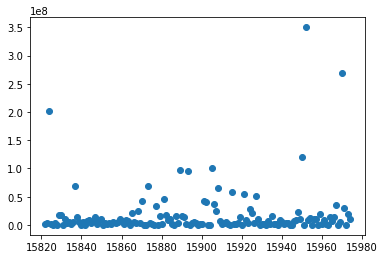

In [525]:
plt.scatter(res['id'] , (res['y'] - model2.predict(test.drop(['id'],axis=1)))**2)

In [526]:
s = pd.DataFrame({
    'id': test['id'],
    'y' : (res['y'] - model2.predict(test.drop(['id'],axis=1)))**2
}) #.to_csv('../data/submission/sub_j2.csv',index=False)

In [527]:
s[s['y'] >= 2e+08]

,id,y
2,15824,2.026160e+08
130,15952,3.501305e+08
148,15970,2.691410e+08


In [528]:
model.predict(test.drop(['id'],axis=1))[-5:]

array([17449.584, 14487.14 , 16350.244, 23084.598, 13026.018],
      dtype=float32)